# 🧪 Workshop - From Pixels to Coordinates: Exploring the Image as a Matrix

## ✅ 1. Prepare the environment with the corresponding tools

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## ✅ 2. Load a color image

In this case, the original image get upload in BRG and using OpenCV functions, generate two images each one corresponding to one of the color models (RGB and HSV)

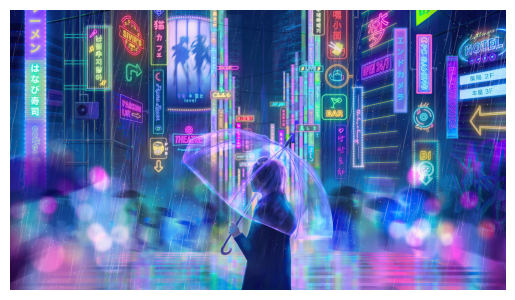

In [2]:
# Load the image
image = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

# Convert BGR to RGB for display
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB to HSV
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Display the image
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

## ✅ 3. Display the channels separated (RGB & HSV)

First of all, it's necessary to divide the channels

In [3]:
r, g, b = cv2.split(rgb_img)
h, s, v = cv2.split(hsv_img)

After that, we are able to show them in screen (In gray scale to show thee intensity of each channel)

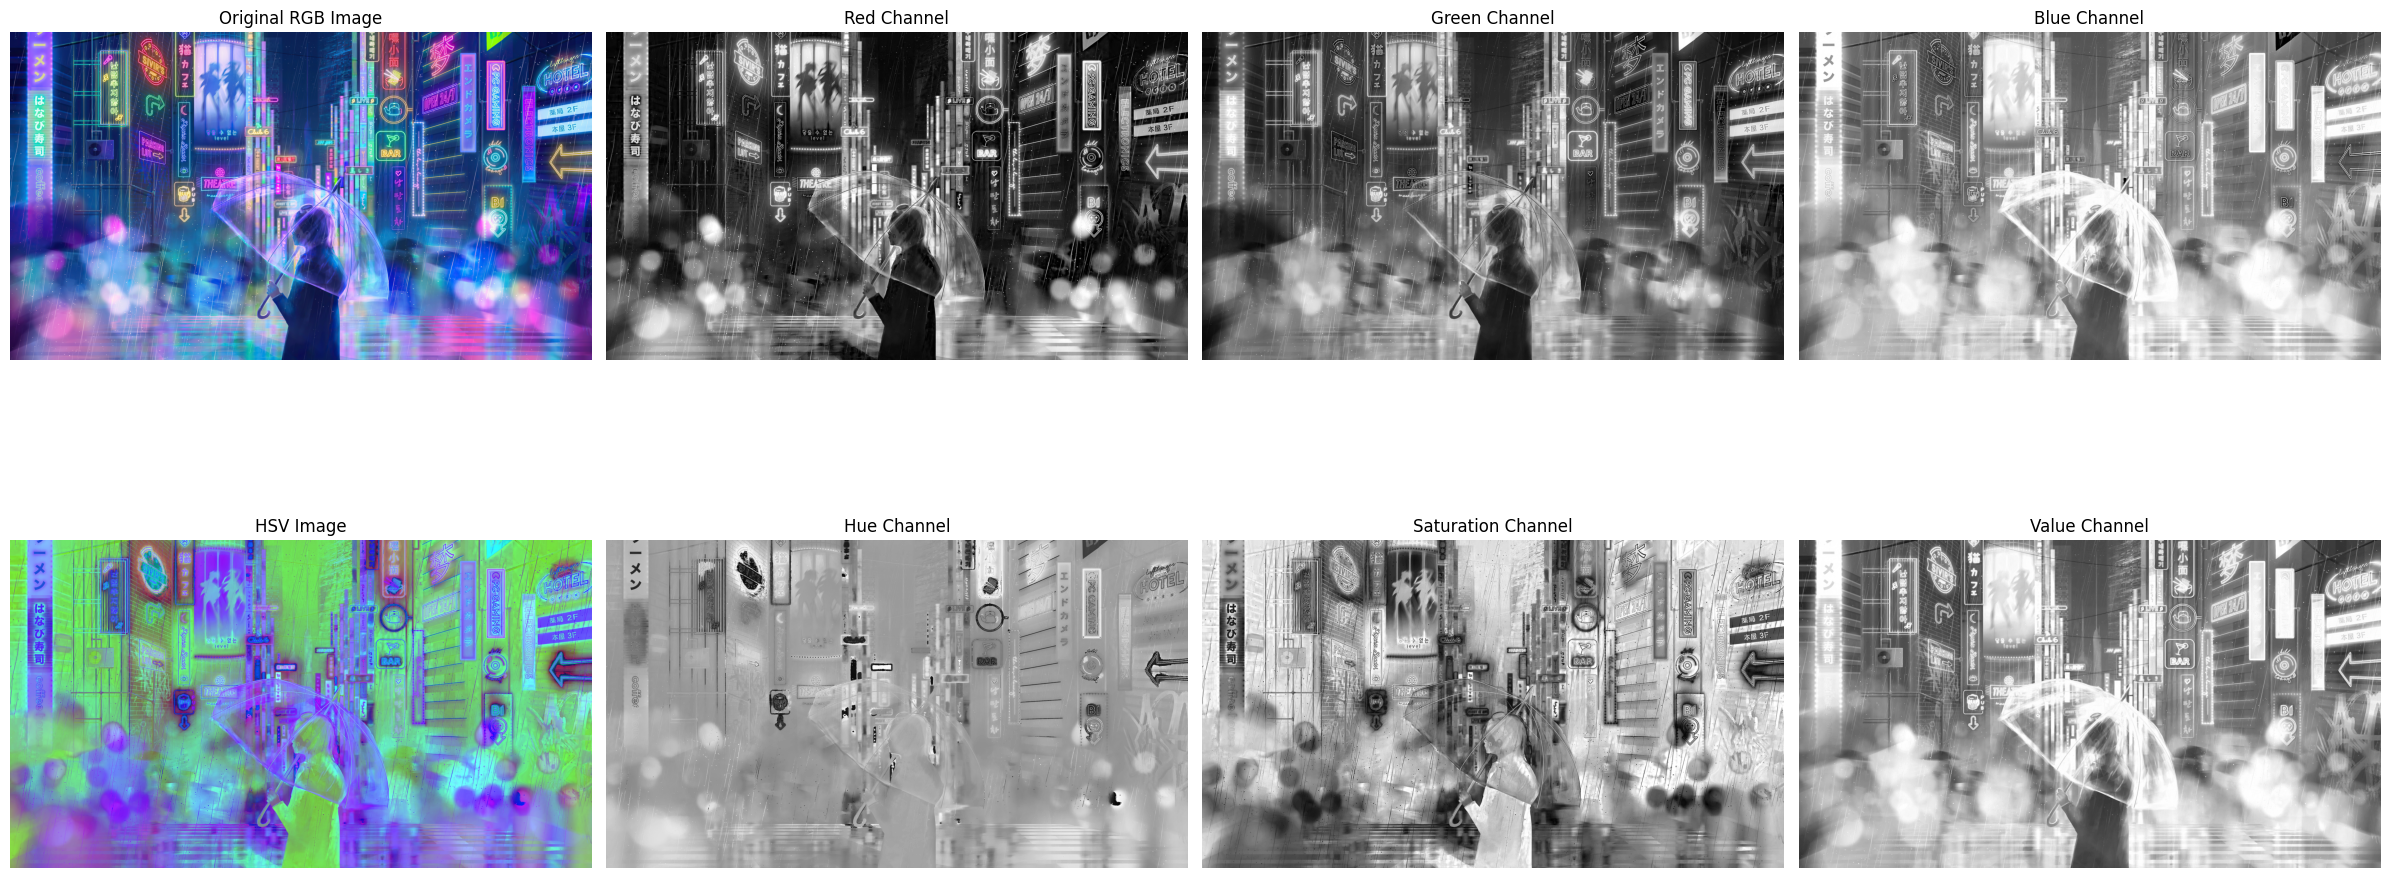

In [4]:
# Display the channels
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

axs[0, 0].imshow(rgb_img)
axs[0, 0].set_title("Original RGB Image")
axs[0, 0].axis('off')

axs[0, 1].imshow(r, cmap='gray')
axs[0, 1].set_title("Red Channel")
axs[0, 1].axis('off')

axs[0, 2].imshow(g, cmap='gray')
axs[0, 2].set_title("Green Channel")
axs[0, 2].axis('off')

axs[0, 3].imshow(b, cmap='gray')
axs[0, 3].set_title("Blue Channel")
axs[0, 3].axis('off')

axs[1, 0].imshow(hsv_img)
axs[1, 0].set_title("HSV Image")
axs[1, 0].axis('off')

axs[1, 1].imshow(h, cmap='gray')
axs[1, 1].set_title("Hue Channel")
axs[1, 1].axis('off')

axs[1, 2].imshow(s, cmap='gray')
axs[1, 2].set_title("Saturation Channel")
axs[1, 2].axis('off')

axs[1, 3].imshow(v, cmap='gray')
axs[1, 3].set_title("Value Channel")
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()

## ✅ 4. Modify image's regions with matrix slicing

First, we need to do a copy of the original image (RGB format) to be able to manipulate it. Also, but not less important, we can access to data such as height, width and color channels.

In [5]:
# Make a copy for both tasks
image_color_change = rgb_img.copy()
image_region_replace = rgb_img.copy()

# Get size parameters
rgb_img_height, rgb_img_width, rgb_img_channels = rgb_img.shape

rgb_img_height, rgb_img_width, rgb_img_channels

(2892, 5120, 3)

After that, we are able to perform the tasks enumerated:
* Change the color of a rectangular area.
* Replace a region with another part of the image.

In [6]:
### Task 1: Change the color of a rectangular area
# Define the region: rows from 50 to 150, columns from 100 to 200
image_color_change[50:2300, 100:1000] = [55, 200, 98]  # Red rectangle (in RGB)

### Task 2: Replace a region with another part of the image
# Define source and destination regions
# Copy region from right
src_region = rgb_img[1000:2800, 4000:4500]
# Paste it into a new place (e.g., at row 200, column 200)
image_region_replace[1000:2800, 2000:2500] = src_region

Finally, we can display all the images to observe the results

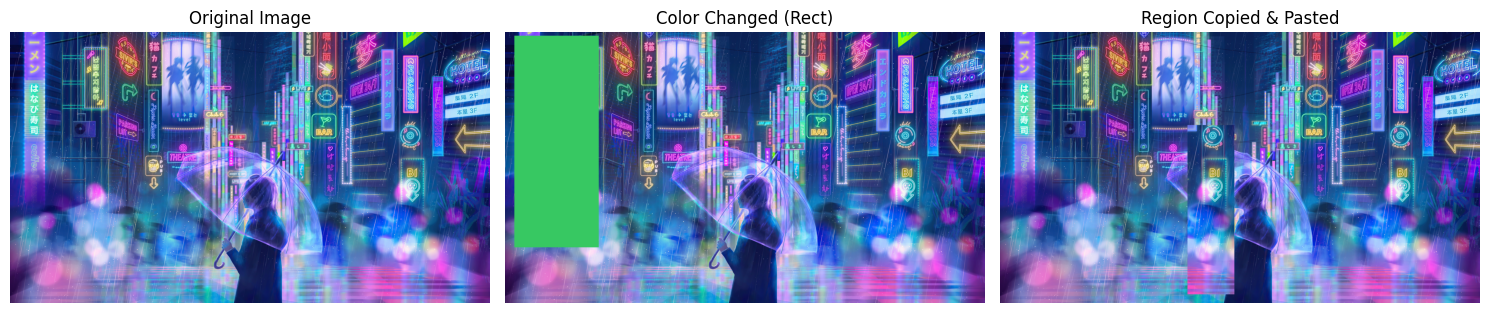

In [7]:
### Display results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(rgb_img)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(image_color_change)
axs[1].set_title("Color Changed (Rect)")
axs[1].axis('off')

axs[2].imshow(image_region_replace)
axs[2].set_title("Region Copied & Pasted")
axs[2].axis('off')

plt.tight_layout()
plt.show()

## ✅ 5. Calculate and display the intensity histogram with `cv2.calcHist()` or `matplotlib.pyplot.hist()`.

First of all, it's important to note that there are three functions implemented for the plotting:
* `plot_color_histograms(image, title)`: This is the normal intensity histogram (rectangular) for RGB model.
* `plot_color_histograms_line(images, titles)`: This is a line based histogram for RGB model.
* `show_hsv_histogram_bars(hsv_image, title='HSV Histogram with Bars')`: This is the normal intensity histogram (rectangular) for HSV model.

In [8]:
# Function to plot color histograms for each image
def plot_color_histograms(image, title):
    """
    Muestra el histograma clásico (con barras) de los canales R, G y B de una imagen en formato RGB.

    Args:
        imagen_rgb: imagen en formato RGB (no BGR).
        titulo: título general del gráfico.
    """
    canales = ('Red', 'Green', 'Blue')
    colores = ('r', 'g', 'b')
    datos_canales = cv2.split(image)

    plt.figure(figsize=(12, 4))
    for i, (datos, nombre, color) in enumerate(zip(datos_canales, canales, colores)):
        plt.subplot(1, 3, i+1)
        plt.hist(datos.ravel(), bins=256, range=(0, 256), color=color, alpha=0.7)
        plt.title(f'Canal {nombre}')
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def plot_color_histograms_line(images, titles):
    fig, axs = plt.subplots(len(images), 1, figsize=(10, 12))

    for i, img in enumerate(images):
        axs[i].set_title(titles[i])
        colors = ('r', 'g', 'b')
        for j, col in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            axs[i].plot(hist, color=col)
        axs[i].set_xlim([0, 256])
        axs[i].set_xlabel('Pixel Intensity')
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


def show_hsv_histogram_bars(hsv_image, title='HSV Histogram with Bars'):
    """
    Displays the classic bar histogram for the H, S, and V channels of a BGR image.

    Args:
        bgr_image: The image in BGR format.
        title: The overall title for the plot.
    """

    # Split the channels
    channels = ('Hue', 'Saturation', 'Value (Brightness)')
    colors = ('m', 'c', 'k')  # magenta, cyan, black (you can change them if you prefer others)
    channel_data = cv2.split(hsv_image)

    # Create plot
    plt.figure(figsize=(12, 4))
    for i, (data, name, color) in enumerate(zip(channel_data, channels, colors)):
        plt.subplot(1, 3, i + 1)
        # For Hue, the range is 0-180 in OpenCV. S and V range from 0-255.
        data_range = (0, 180) if i == 0 else (0, 256)
        plt.hist(data.ravel(), bins=256, range=data_range, color=color, alpha=0.7)
        plt.title(f'Channel {name}')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

Then, with the functions properly defined, we can plot the histograms

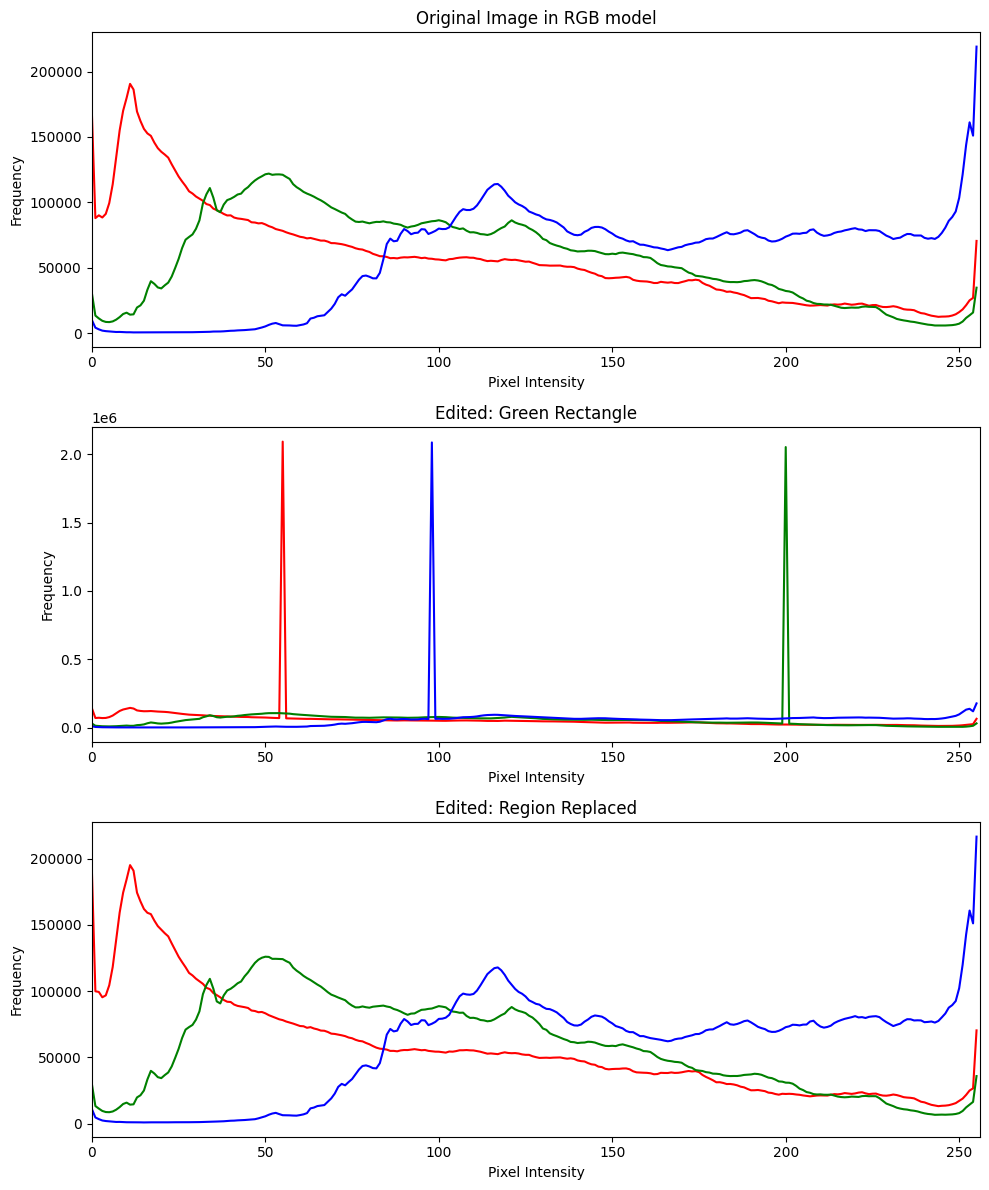

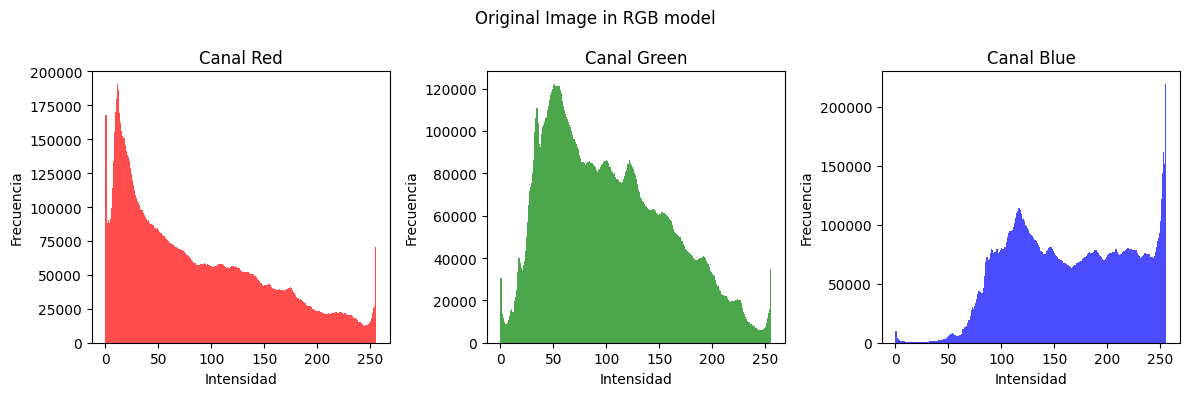

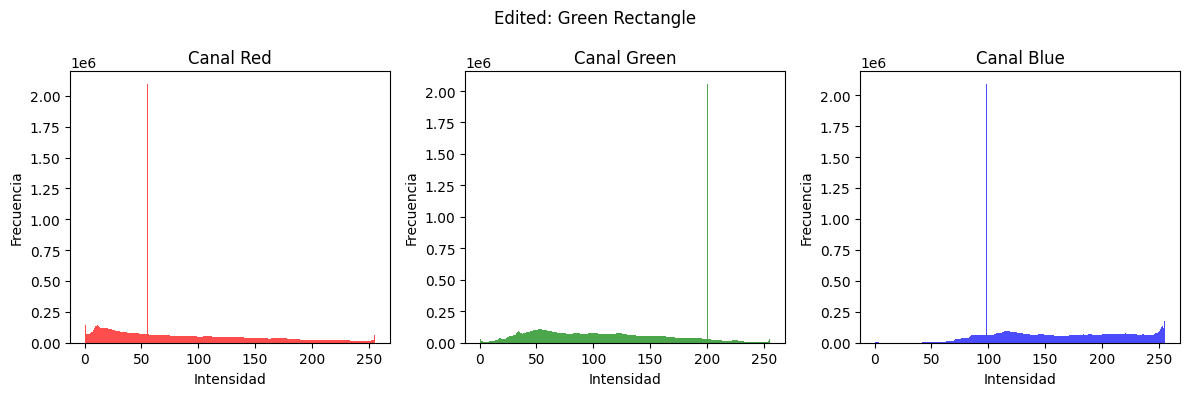

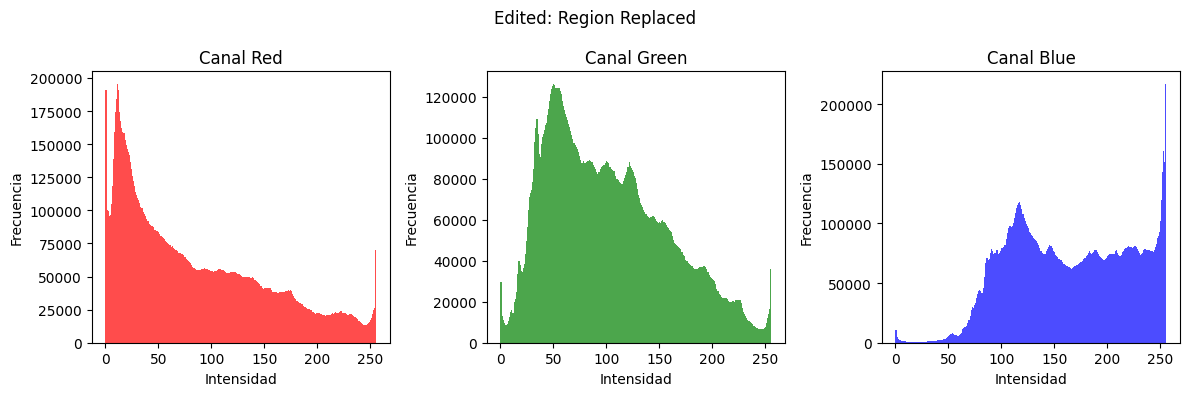

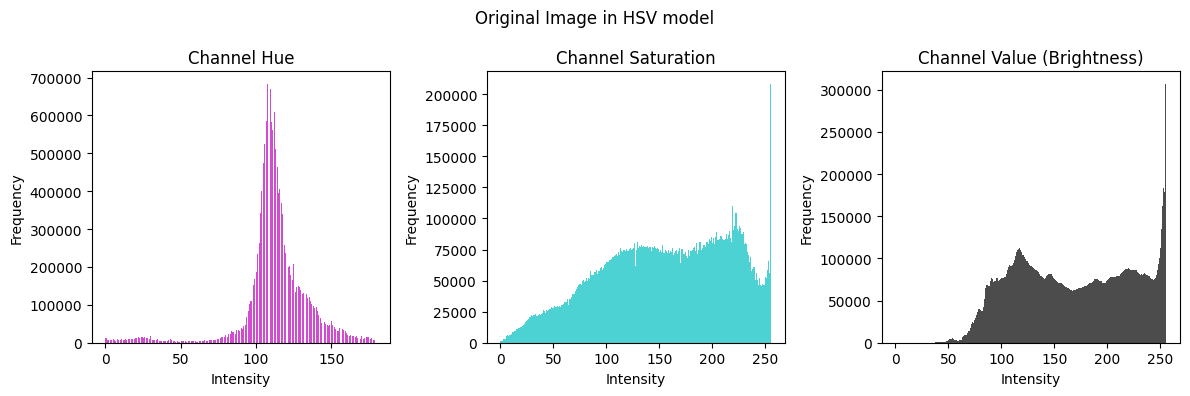

In [9]:
# Plot histograms
plot_color_histograms_line(
    [rgb_img, image_color_change, image_region_replace],
    ["Original Image in RGB model", "Edited: Green Rectangle", "Edited: Region Replaced"]
)

for(image, title) in zip([rgb_img, image_color_change, image_region_replace], ["Original Image in RGB model", "Edited: Green Rectangle", "Edited: Region Replaced"]):
  plot_color_histograms(image, title)

show_hsv_histogram_bars(hsv_img,"Original Image in HSV model")


## ✅ 6. Apply brightness and contrast adjustments

In this section, i deciced to create an interactive function with sliders to modify brightness and contrast in real time using ipywidgets and IPython.display. (Bonus).

That's why it is necessary to import the following libraries:

In [10]:
import ipywidgets as widgets
from IPython.display import display

Also, it is necessary to encapsulate the function that allows the interaction

In [11]:
def update_image(brightness, contrast):
    # Aplicar el cambio de brillo y contraste usando cv2.convertScaleAbs
    adjusted = cv2.convertScaleAbs(rgb_img, alpha=contrast, beta=brightness-100)

    # Mostrar la imagen ajustada en el notebook con matplotlib
    plt.imshow(adjusted)
    plt.axis('off')  # No mostrar los ejes
    plt.show()

Finally, this block of code, displays the widget to adjust the brightness dynamically.

In [12]:
# Crear los sliders para brillo y contraste
brightness_slider = widgets.IntSlider(value=100, min=0, max=200, step=1, description='Brightness')
contrast_slider = widgets.FloatSlider(value=1.0, min=0.0, max=2.0, step=0.05, description='Contrast')

# Llamar la función de actualización con los valores de los sliders
widgets.interactive(update_image, brightness=brightness_slider, contrast=contrast_slider)

interactive(children=(IntSlider(value=100, description='Brightness', max=200), FloatSlider(value=1.0, descript…